### 📌 **Practical Notebook - AI Problem Solving**
#### **Constraint Satisfaction Problems (CSP), Cryptarithmetic Puzzles, and Adversarial Search**
Amir Mohammad Mahfozi - Arman Tahmasebi

---

# <div align="center">
# <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150>
# <br>
# <font color=0F5298 size=7>
# Artificial Intelligence - Practical Assignment
# </font>
# </div>

---

## **📝 Student Information**
Before starting the assignment, please fill in your details below.

- **Name:** Matin Bagheri
- **Student ID:** 402105727

---

## **🏰 The Kingdom Conflict of Eldoria**
### **📖 Background Story**
The great land of **Eldoria** is composed of multiple **kingdoms**, each ruled by different noble families. Due to historical rivalries and past wars, some kingdoms refuse to be aligned with the same ruling faction.

Your task is to ensure diplomatic stability by:
1. **Assigning ruling factions (colors) to each kingdom.**
2. **Ensuring that neighboring rival kingdoms do not share the same faction.**
3. **Minimizing the number of different factions used while ensuring fairness.**

This problem is a classic example of a **Constraint Satisfaction Problem (CSP)**, specifically **Graph Coloring**, where:
- Each **kingdom** is a **node** in a graph.
- Each **rivalry** between two kingdoms is an **edge** connecting two nodes.
- Each **ruling faction (color)** is an **assignment** that must follow constraints.

---
### **🔢 Unlocking the Treasure - Cryptarithmetic Puzzles**
After stabilizing Eldoria, you discover an ancient locked **treasure chest** deep within the royal archives.  
The lock is encrypted with a **mathematical puzzle**, and only those skilled in **Cryptarithmetic** can solve it.  
Your mission: **Decode the puzzle** and open the treasure!

---
### **🎮 The Hidden Challenge - Adversarial Search in Othello**
Inside the chest, you find an ancient **board game** that requires strategic thinking. The game is a **version of Othello**,  
and to win, you must design an **intelligent AI agent** using **Adversarial Search techniques** like:
- **Minimax Algorithm**
- **Alpha-Beta Pruning**
- **Expectimax**

Your final task: **Train an AI agent to play and win the game!** 🏆

---
## **🎯 Learning Objectives**
By the end of this assignment, you will:
✅ Understand how **Constraint Satisfaction Problems (CSPs)** work.  
✅ Learn how to solve a **Graph Coloring Problem** using CSP techniques.  
✅ Implement **Backtracking Search** to find valid assignments.  
✅ Solve **Cryptarithmetic Puzzles** with AI techniques.  
✅ Apply **Adversarial Search Algorithms** in strategic decision-making.  

---
## **📌 Instructions**
1. **Read each section carefully** and follow the explanations.
2. Parts of the code are **missing** (marked as `TODO`). You need to **fill them in**.
3. **Run each code cell** after implementing the missing parts.
4. Answer the **questions** provided in some sections.

Let's begin! 🎯


## **Problem Statement: Graph Coloring CSP**
Eldoria is represented as an **undirected graph**, where:
- **Each kingdom is a node**.
- **Each edge signifies a historical conflict** between two kingdoms that refuse to be ruled by the same faction.
- **Your goal is to assign each kingdom a faction (color) while ensuring no two neighboring kingdoms share the same faction.**

### **Input Format:**
- The first line contains an integer $N$ representing the number of **kingdoms**.
- The second line contains an integer $M$ indicating the number of **available factions (colors)**.
- The next $E$ lines each contain two integers $u$ and $v$, representing a conflict between kingdoms $u$ and $v$.


#### **Example Input:**
```
5
3
0 1
0 2
1 3
1 4
3 4
```

### **Output Format:**
- A list where each index represents a kingdom, and the value at that index represents its assigned faction (color).


### **Your Task:**
- Implement the **AC-3 Algorithm** for constraint propagation.
- Use **Minimum Remaining Values (MRV)** and **Least Constraining Value (LCV)** heuristics to optimize the solution.
- Apply **Backtracking Search** to find a valid ruling assignment.

### **Implementation**

#### **Step 1: Load Libraries**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import copy
from collections import deque

np.random.seed(42)

#### **Step 2: Define the Kingdom Conflict Graph**
The function should read from a file.
Store conflict information in a dictionary.
Initialize each kingdom's faction choices.

In [20]:
# Store conflicts and domain constraints
conflicts = {}
factions = {}

# Function to parse input data
def load_kingdom_data(file_path):
    conflicts.clear()
    factions.clear()
    with open(file_path, 'r') as f:
        data = f.readlines()

    global num_kingdoms, num_factions
    num_kingdoms = int(data[0].strip())
    num_factions = int(data[1].strip())

    for i in range(num_kingdoms):
        conflicts[i] = []
        factions[i] = list(range(num_factions))

    for line in data[2:]:
        u, v = map(int, line.strip().split())
        conflicts[u].append(v)
        conflicts[v].append(u)

#### **Step 3: Implement AC-3 Algorithm**
AC-3 (Arc Consistency 3) is used to reduce the domain of choices for each kingdom before backtracking.

📝 TODO: Implement the revise() function
This function should remove invalid faction choices for a kingdom.
It ensures that neighboring kingdoms do not get the same faction.

In [21]:
def ac3(variables):
    """ Applies AC-3 constraint propagation algorithm. Returns True if a valid assignment remains and False otherwise. """
    # initialize the queue with all current arcs
    queue = deque()
    for x in range(num_kingdoms):
        for y in conflicts[x]:
            if y > x: queue.append((x, y))

    while queue:
        arc = queue.popleft()
        if revise(arc[0], arc[1]):
            if not len(factions[arc[0]]): return False # no color can be assigned to x
            for y in conflicts[arc[0]]:
                queue.append((y, arc[0]))

    return True

def revise(x, y):
    """ Removes values from x that are inconsistent with y. """
    revised = False
    to_remove = []
    for c in factions[x]:
        if all(c == c2 for c2 in factions[y]):
            to_remove.append(c)

    for c in to_remove:
        factions[x].remove(c)
        revised = True
    return revised


#### **Step 4: Implement Heuristics - MRV & LCV**
MRV (Minimum Remaining Values) selects the most constrained variable first.
LCV (Least Constraining Value) picks values that minimize conflicts.

In [22]:
def select_unassigned_variable():
    """ Selects the most constrained kingdom (MRV heuristic). """
    min_length = 1e+9 # a fairly great number
    for i in range(num_kingdoms):
        if len(factions[i]) == 1: continue
        min_length = min(len(factions[i]), min_length)

    keys_with_min_length = [k for k, lst in factions.items() if len(lst) == min_length]
    if (len(keys_with_min_length) == 1):
        return keys_with_min_length[0]

    # Degree heuristic(tie breaker):
    selected = None
    max_no_constraints = -1  # max number of constraints with unassigned variables
    for v in keys_with_min_length:
        no_constraints = 0
        for c in conflicts[v]:
            if len(factions[c]) > 1 : # unassigned
                no_constraints += 1
        if no_constraints > max_no_constraints :
            max_no_constraints = no_constraints
            selected = v

    return selected


def order_domain_values(var):
    """ Orders factions based on LCV heuristic. """
    cc = {} # caused_constraints
    for v in factions[var]:
        cc[v] = 0
        for neighbor in conflicts[var]:
            if v in factions[neighbor]:
                cc[v] += 1
    return sorted(cc.keys(), key=lambda k: cc[k])


#### **Step 5: Implement Backtracking Search**
Try assigning a faction to a kingdom.
Use AC-3 to reduce domains.
Revert changes if a failure occurs (backtracking).

In [23]:
def backtrack():
    """ Uses Backtracking Search to assign factions. """
    if all(len(factions[v]) == 1 for v in factions):
        return {v: factions[v][0] for v in factions}  # Solution found

    var = select_unassigned_variable()
    # print("selected: ", var)
    for value in order_domain_values(var):
        temp_factions = copy.deepcopy(factions)
        factions[var] = [value]

        if ac3(factions):
            result = backtrack()
            if result:
                return result

        factions.update(temp_factions)
    return None


#### **Step 6: Validate and Test the Implementation**

In [24]:
load_kingdom_data('input0.txt')
solution = backtrack()
print("Kingdom Assignments:", solution)

Kingdom Assignments: {0: 1, 1: 0, 2: 0, 3: 1, 4: 2}


#### **Step 7: Visualize the Solution**

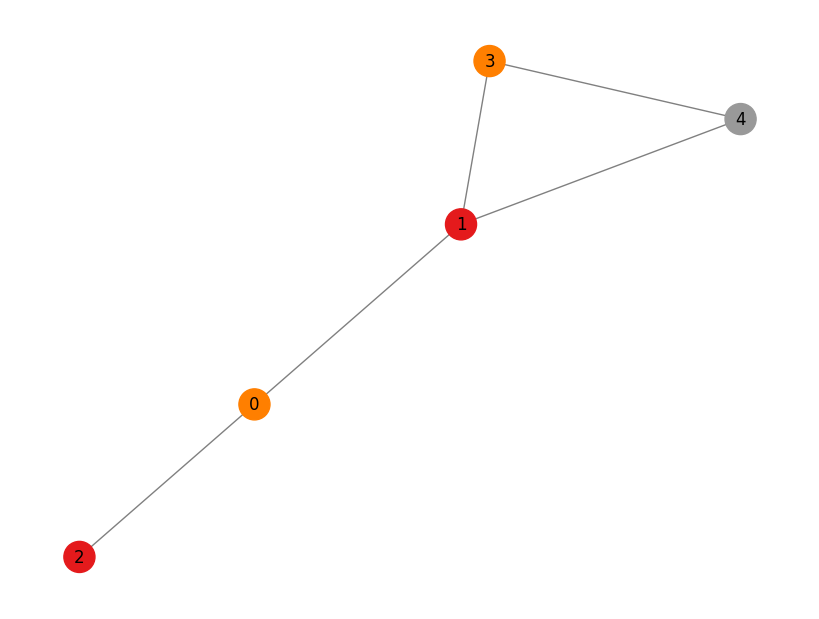

In [25]:
def plot_kingdoms():
    G = nx.Graph()
    for kingdom, neighbors_list in conflicts.items():
        for neighbor in neighbors_list:
            G.add_edge(kingdom, neighbor)

    pos = nx.spring_layout(G)
    factions_map = [solution[node] for node in G.nodes()]

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=factions_map, cmap=plt.cm.Set1, edge_color='gray', node_size=500)
    plt.show()

plot_kingdoms()

Kingdom Assignments: {0: 2, 1: 2, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0, 10: 1, 11: 0, 12: 1, 13: 0, 14: 1, 15: 0, 16: 1, 17: 0, 18: 1, 19: 0, 20: 1, 21: 0, 22: 1, 23: 0, 24: 1, 25: 0, 26: 1, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 1, 33: 0, 34: 1, 35: 0, 36: 1, 37: 0, 38: 1, 39: 0}


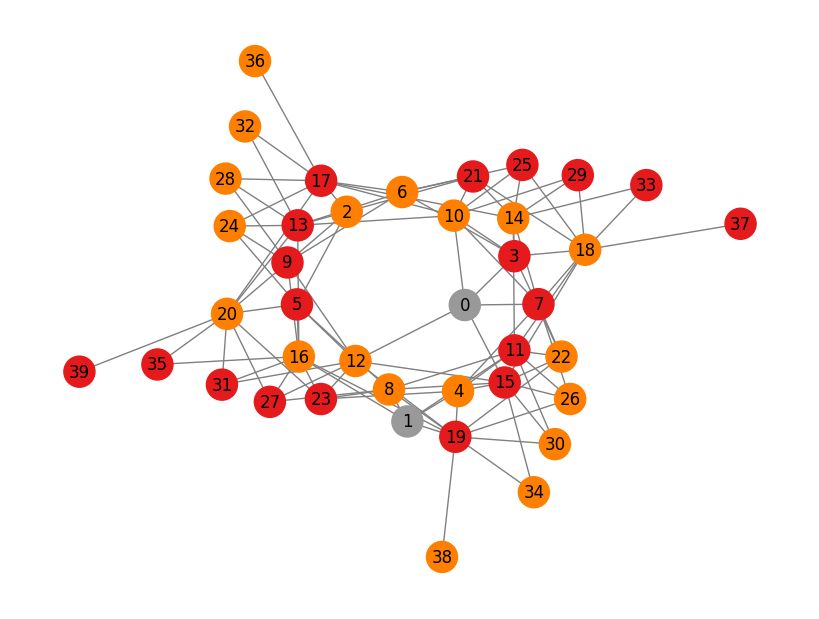

In [26]:
load_kingdom_data('map.txt')
solution = backtrack()
print("Kingdom Assignments:", solution)
plot_kingdoms()

## **Part 2: Unlocking the Treasure (Cryptarithmetic Puzzle CSP)**
### **Background:**
After successfully stabilizing the kingdom, the great vault of Eldoria's lost treasure has been discovered. However, it is **locked with an ancient code** that must be deciphered using a **cryptarithmetic puzzle**. Your task is to crack the code and unlock the treasure!

---

### **Problem Statement: Cryptarithmetic Puzzle**
The treasure chest is locked using a numerical puzzle where **letters represent unique digits (0-9)**. You must assign each letter a unique digit such that the given arithmetic equation holds.

#### **Example Puzzle:**
```
  GOLD
+ COIN
------
  CHEST
```
Each letter corresponds to a distinct digit, and the equation must be mathematically valid.

### **Constraints:**
- Each **letter represents a unique digit** (0-9).
- No two letters can have the **same digit**.
- The sum must be mathematically correct.
- No leading zeros.

---

### **Your Task:**
- Implement **Backtracking Search** to assign digits to letters.
- Use **Minimum Remaining Values (MRV)** and **Least Constraining Value (LCV)** heuristics to optimize the solution.
- Ensure the final assignment satisfies all constraints.

---

### **Implementation**

#### **Step 1: Define the Cryptarithmetic Puzzle**
We need a function to convert a word into a number based on a given letter-digit mapping.

📝 TODO: Implement word_to_number()
Convert a word into a number using the given mapping.
Example: If mapping = {'S': 9, 'E': 5, 'N': 6, 'D': 7},
then "SEND" should convert to 9567.

In [ ]:
########## THE INITIAL CODE (BRUTE FORCE) ##########
import itertools
def word_to_number(word, mapping):
    """ Converts a word into its numeric equivalent using the mapping. """
    return int("".join(str(mapping[char]) for char in word))

def is_valid_solution(mapping, words, result):
    """ Checks if the given letter-to-digit mapping satisfies the puzzle equation. """
    return sum(word_to_number(word, mapping) for word in words) == word_to_number(result, mapping)

def solve_cryptarithmetic(words, result):
    """ Finds a valid digit assignment to solve the cryptarithmetic puzzle. """
    # Step 1: Extract unique letters
    letters = set("".join(words) + result)
    assert len(letters) <= 10, "Too many unique letters for a valid cryptarithmetic puzzle."

    # Step 2: Try all digit assignments
    for perm in itertools.permutations(range(10), len(letters)):
        mapping = dict(zip(letters, perm))

        # Ensure no leading zeros for any first letter
        if any(mapping[word[0]] == 0 for word in words + [result]):
            continue

        if is_valid_solution(mapping, words, result):
            return mapping

    return None  # No solution found

words = ["SEND", "MORE"]
result = "MONEY"
solution = solve_cryptarithmetic(words, result)
print("Solution:", solution if solution else "No solution found")

Solution: {'E': 5, 'O': 0, 'D': 7, 'M': 1, 'N': 6, 'R': 8, 'S': 9, 'Y': 2}


In [ ]:
import itertools
def word_to_number(domain, word):
    digits = {char: values[0] for char, values in domain.items()}
    return int("".join(str(digits[char]) for char in word))

def choose_letter(domain): # using MRV
    # Filter out assigned letters
    unassigned = {char: domain[char] for char in domain if len(domain[char]) > 1}
    if not unassigned:
        return None
    # Find the letter with the smallest domain
    return min(unassigned, key=lambda char: len(unassigned[char]))

def correct_sum(domain, words, result):
    return sum(word_to_number(domain, word) for word in words) == word_to_number(domain, result)

def unique_digit(domain, digit):
    assigned = {char: domain[char] for char in domain if len(domain[char]) == 1}
    for l in assigned:
        if domain[l][0] == digit:
            return False
    return True

def sorted_domain(domain):
  return sorted(domain) # LCV: considering all variables must be assigned in order to check validity, not much can be done in order to find the Least Constraining Value


In [ ]:
def backtrack(domain, words, result):
    # check if solution is complete
    letter = choose_letter(domain)
    if not letter:
        return domain if correct_sum(domain, words, result) else None

    for digit in sorted_domain(domain[letter]):
        if unique_digit(domain, digit):
            temp_domain = copy.deepcopy(domain)
            domain[letter] = [digit]
            solution = backtrack(domain, words, result)
            if solution:
                return solution

            domain.update(temp_domain)

    return None

#### **Step 2: Solve Using Backtracking**
Identify all unique letters.
Generate all possible digit permutations for these letters.
Check each assignment to find a valid solution.

In [ ]:
def solve_cryptarithmetic(words, result):
    """ Finds a valid digit assignment to solve the cryptarithmetic puzzle. """
    # Extract unique letters
    letters = set("".join(words) + result)
    assert len(letters) <= 10, "Too many (over 10) unique letters for a validcryptarithmetic puzzle."

    # set the domain
    domain = {}
    for char in letters:
        domain[char] = set(range(10))

    # remove leading zeros
    domain.update({word[0]: domain[word[0]] - {0} for word in words + [result]})

    return backtrack(domain, words, result) # returns None if no solution found

#### **Step 3: Run and Display the Solution**

In [ ]:
words = ["SEND", "MORE"]
result = "MONEY"
solution = solve_cryptarithmetic(words, result)
print("Solution:", solution if solution else "No solution found")

Solution: {'E': [5], 'O': [0], 'D': [7], 'M': [1], 'N': [6], 'R': [8], 'S': [9], 'Y': [2]}


The Final Lock – Unlocking the Treasure Chest
After solving the kingdom conflict puzzle, you finally reach the hidden treasure chest deep inside the ruins of Eldoria. The chest is ancient, covered in golden engravings, and protected by a mystical numerical lock.

As you examine the lock, you notice an inscription:

"Only the sacred word shall reveal the wealth within. Transform the letters into digits, and the treasure shall be yours!"

You recall the ancient texts that spoke of "SERMON", a word of wisdom and power. But the lock requires a six-digit code that matches the letters in the word SERMON.

The final numeric code is:

958106

# 📌 **Adversarial Search - Othello AI**
### **Background**
After unlocking the treasure, you find an **ancient AI-driven board game** known as **Othello**!  
The grandmasters of Eldoria challenge you to **build an AI agent** that can **compete against them**.  

Your mission:  
✔ Implement **Minimax**, **Alpha-Beta Pruning**, and **Expectimax** to make your AI **unbeatable**.  
✔ Ensure **the AI follows the rules of Othello** and plays optimally.  

---

## **🛠️ Game Rules**
1. Players take turns placing pieces on an **8x8 board**.
2. A move is valid if it **captures at least one opponent piece**.
3. Captured pieces are **flipped** to the current player’s color.
4. The game **ends when both players have no valid moves**.
5. The player with the **most pieces on the board wins**.

---

## **🎯 Your Task**
- Implement a **valid move function**.
- Implement **Minimax, Alpha-Beta Pruning, and Expectimax** agents.
- Make the AI play **against itself**.

---

## **Step 1: Load Required Libraries**
Below is the game logic there is no need to change anything.

In [ ]:
# othello.py
import pygame

# Constants
WIDTH, HEIGHT = 600, 600
GRID_SIZE = 8
CELL_SIZE = WIDTH // GRID_SIZE
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (34, 139, 34)
GRAY = (200, 200, 200)

class Othello:
    def __init__(self):
        self.board = [[' ' for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
        self.board[3][3] = self.board[4][4] = 'W'
        self.board[3][4] = self.board[4][3] = 'B'
        self.current_player = 'B'
        self.turn_count = 1

    def is_valid_move(self, row, col):
        if self.board[row][col] != ' ':
            return False
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        opponent = 'B' if self.current_player == 'W' else 'W'

        for dr, dc in directions:
            r, c = row + dr, col + dc
            found_opponent = False
            while 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == opponent:
                r += dr
                c += dc
                found_opponent = True
            if found_opponent and 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == self.current_player:
                return True
        return False

    def get_valid_moves(self):
        return [(r, c) for r in range(GRID_SIZE) for c in range(GRID_SIZE) if self.is_valid_move(r, c)]

    def make_move(self, row, col):
        if not self.is_valid_move(row, col):
            return False

        self.board[row][col] = self.current_player
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        opponent = 'B' if self.current_player == 'W' else 'W'

        for dr, dc in directions:
            r, c = row + dr, col + dc
            captured = []
            while 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == opponent:
                captured.append((r, c))
                r += dr
                c += dc
            if captured and 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == self.current_player:
                for cr, cc in captured:
                    self.board[cr][cc] = self.current_player

        self.current_player = 'B' if self.current_player == 'W' else 'W'
        self.turn_count += 1
        return True

    def game_over(self):
        """ The game ends only if BOTH players have no valid moves """
        current_moves = self.get_valid_moves()

        # Temporarily switch player to check opponent's moves
        self.current_player = 'B' if self.current_player == 'W' else 'W'
        opponent_moves = self.get_valid_moves()

        # Switch back to original player
        self.current_player = 'B' if self.current_player == 'W' else 'W'

        # Game only ends when BOTH players cannot move
        return len(current_moves) == 0 and len(opponent_moves) == 0


    def get_winner(self):
        black_count = sum(row.count('B') for row in self.board)
        white_count = sum(row.count('W') for row in self.board)
        if black_count > white_count:
            return "Black Wins!"
        elif white_count > black_count:
            return "White Wins!"
        else:
            return "It's a Draw!"


## **Step 2: Implement AI Agents**
TODO: Implement Minimax Agent
Minimax recursively chooses the best move by:

Maximizing its own advantage.
Minimizing the opponent's advantage.
Exploring a tree of possible game states.

In [ ]:
import copy

class MinimaxAgent:
    def __init__(self, depth):
        self.depth = depth


    def get_move(self, game):
        """ Runs Minimax to determine the best move. """
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return None

        best_move = None
        best_value = -10**9
        for move in valid_moves:
            moved_game = copy.deepcopy(game)
            moved_game.make_move(move[0], move[1])
            value = self.minimax(moved_game, self.depth - 1, False)
            if value > best_value:
                best_value = value
                best_move = move

        return best_move



    def evaluate(self, game):
        """ tried to have a complex evaluation function and consider many factors """
        white = sum(row.count('W') for row in game.board)
        black = sum(row.count('B') for row in game.board)

        corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
        black_corner = sum(game.board[x][y] == 'B' for x, y in corners)
        white_corner = sum(game.board[x][y] == 'W' for x, y in corners)

        edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6),
                 (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]
        black_edges = sum(game.board[x][y] == 'B' for x, y in edges)
        white_edges = sum(game.board[x][y] == 'W' for x, y in edges)

        # Who has more moves:
        switched = False
        if game.current_player == 'W':
            game.current_player = 'B'
            switched = True
        black_moves = len(game.get_valid_moves())
        # Switch player
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        white_moves = len(game.get_valid_moves())
        # Switch back
        if not switched:
            game.current_player = 'W' if game.current_player == 'B' else 'B'

        value = (black - white) + 2 * (black_edges - white_edges) + 3 * (black_corner - white_corner) + (black_moves - white_moves)
        if game.current_player == 'B':
            return value
        return -value



    def minimax(self, game, depth, maximizing_player):
        """ Recursively explores possible moves using Minimax.
            maximizing_player is a boolean that determines the type of the current player """
        if depth == 0 or game.game_over():
            return self.evaluate(game)

        valid_moves = game.get_valid_moves()
        if not valid_moves:
            game.current_player = 'B' if game.current_player == 'W' else 'W'
            return self.minimax(game, depth, not maximizing_player)

        if maximizing_player:
            max_v = -10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.minimax(moved_game, depth - 1, not maximizing_player)
                max_v = max(max_v, value)
            return max_v
        else:
            min_v = 10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.minimax(moved_game, depth - 1, not maximizing_player)
                min_v = min(min_v, value)
            return min_v


📝 TODO: Implement Alpha-Beta Pruning
Alpha-Beta Pruning optimizes Minimax by eliminating unnecessary branches.

In [ ]:
import copy

class AlphaBetaAgent:
    def __init__(self, depth):
        self.depth = depth


    def get_move(self, game):
        """ Runs Alpha-Beta Pruning to determine the best move. """
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return None

        best_move = None
        best_value = -10**9  # large negative integer as negative infinity
        alpha = -10**9
        beta = 10**9

        for move in valid_moves:
            moved_game = copy.deepcopy(game)
            moved_game.make_move(move[0], move[1])
            value = self.alpha_beta(moved_game, self.depth - 1, alpha, beta, False)
            if value > best_value:
                best_value = value
                best_move = move
            alpha = max(alpha, best_value)
        return best_move



    def evaluate(self, game):
        """ tried to have a complex evaluation function and consider many factors """
        white = sum(row.count('W') for row in game.board)
        black = sum(row.count('B') for row in game.board)

        corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
        black_corner = sum(game.board[x][y] == 'B' for x, y in corners)
        white_corner = sum(game.board[x][y] == 'W' for x, y in corners)

        edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6),
                 (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]
        black_edges = sum(game.board[x][y] == 'B' for x, y in edges)
        white_edges = sum(game.board[x][y] == 'W' for x, y in edges)

        # Who has more moves:
        switched = False
        if game.current_player == 'W':
            game.current_player = 'B'
            switched = True
        black_moves = len(game.get_valid_moves())
        # Switch player
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        white_moves = len(game.get_valid_moves())
        # Switch back
        if not switched:
            game.current_player = 'W' if game.current_player == 'B' else 'B'

        value = (black - white) + 2 * (black_edges - white_edges) + 3 * (black_corner - white_corner) + (black_moves - white_moves)
        if game.current_player == 'B':
            return value
        return -value




    def alpha_beta(self, game, depth, alpha, beta, maximizing_player):
        """ Applies pruning to Minimax for efficiency. """
        # Terminal condition: max depth reached or game over.
        if depth == 0 or game.game_over():
            return self.evaluate(game)

        valid_moves = game.get_valid_moves()
        # If the current player has no valid moves, simulate a pass move:
        if not valid_moves:
            # Toggle the current player without reducing depth.
            game.current_player = 'B' if game.current_player == 'W' else 'W'
            return self.alpha_beta(game, depth, alpha, beta, not maximizing_player)

        if maximizing_player:
            best_val = -10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.alpha_beta(moved_game, depth - 1, alpha, beta, not maximizing_player)
                best_val = max(best_val, value)
                alpha = max(alpha, best_val)
                if beta <= alpha:
                    break  # Beta cut-off
            return best_val
        else:
            best_val = 10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.alpha_beta(moved_game, depth - 1, alpha, beta, not maximizing_player)
                best_val = min(best_val, value)
                beta = min(beta, best_val)
                if beta <= alpha:
                    break  # Alpha cut-off
            return best_val


*📝* TODO: Implement Expectimax Agent
Expectimax is used when the opponent’s move is not optimal and follows a probabilistic strategy.

In [ ]:
import copy

class ExpectimaxAgent:
    def __init__(self, depth):
        self.depth = depth

    def get_move(self, game):
        """
        Runs Expectimax to determine the best move.
        If no valid moves are available, returns None.
        """
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return None

        best_move = None
        best_value = -10**9
        for move in valid_moves:
            moved_game = copy.deepcopy(game)
            moved_game.make_move(move[0], move[1])
            value = self.expectimax(moved_game, self.depth - 1, False)
            if value > best_value:
                best_value = value
                best_move = move

        return best_move


    def evaluate(self, game):
        """ tried to have a complex evaluation function and consider many factors """
        white = sum(row.count('W') for row in game.board)
        black = sum(row.count('B') for row in game.board)

        corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
        black_corner = sum(game.board[x][y] == 'B' for x, y in corners)
        white_corner = sum(game.board[x][y] == 'W' for x, y in corners)

        edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6),
                 (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]
        black_edges = sum(game.board[x][y] == 'B' for x, y in edges)
        white_edges = sum(game.board[x][y] == 'W' for x, y in edges)

        # Who has more moves:
        switched = False
        if game.current_player == 'W':
            game.current_player = 'B'
            switched = True
        black_moves = len(game.get_valid_moves())
        # Switch player
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        white_moves = len(game.get_valid_moves())
        # Switch back
        if not switched:
            game.current_player = 'W' if game.current_player == 'B' else 'B'

        value = (black - white) + 2 * (black_edges - white_edges) + 3 * (black_corner - white_corner) + (black_moves - white_moves)
        if game.current_player == 'B':
            return value
        return -value


    def expectimax(self, game, depth, maximizing_player):
        """ Uses probability-weighted decision-making instead of Minimax. """
        if depth == 0 or game.game_over():
            return self.evaluate(game)

        valid_moves = game.get_valid_moves()
        if not valid_moves:
            game.current_player = 'B' if game.current_player == 'W' else 'W'
            return self.expectimax(game, depth, not maximizing_player)

        if maximizing_player:
            # The agent's turn: choose the move with the maximum expected value.
            best_value = -10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.expectimax(moved_game, depth - 1, False)
                best_value = max(best_value, value)
            return best_value
        else:
            # Opponent's turn (chance node): average over the moves.
            total = 0
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                total += self.expectimax(moved_game, depth - 1, True)
            return total / len(valid_moves)


You can use the code below to initiate an agent and play with yourself

In [ ]:
# main.py
import pygame

# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Othello Game")

# Load game instance
game = Othello()

# Choose AI agent (Modify as needed)
# agent = MinimaxAgent(depth=4)
agent = AlphaBetaAgent(depth=6)  # Using Alpha-Beta Pruning
# agent = ExpectimaxAgent(depth=4)

def draw_board(screen, game):
    """ Draws the Othello board and pieces """
    screen.fill((34, 139, 34))  # Green background
    for i in range(9):  # Grid lines
        pygame.draw.line(screen, (0, 0, 0), (i * 75, 0), (i * 75, 600))
        pygame.draw.line(screen, (0, 0, 0), (0, i * 75), (600, i * 75))

    # Draw pieces
    for r in range(8):
        for c in range(8):
            if game.board[r][c] == 'B':
                pygame.draw.circle(screen, (0, 0, 0), (c * 75 + 37, r * 75 + 37), 30)
            elif game.board[r][c] == 'W':
                pygame.draw.circle(screen, (255, 255, 255), (c * 75 + 37, r * 75 + 37), 30)

    # Display turn count
    font = pygame.font.Font(None, 36)
    turn_text = font.render(f"Turn: {game.turn_count}", True, (255, 255, 255))
    screen.blit(turn_text, (10, 10))

    pygame.display.flip()

# Game loop
running = True
while running:
    draw_board(screen, game)  # Update board graphics each frame

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN and game.current_player == 'B':
            x, y = pygame.mouse.get_pos()
            row, col = y // 75, x // 75
            if (row, col) in game.get_valid_moves():
                game.make_move(row, col)
        elif game.current_player == 'W':  # AI's turn
            ai_move = agent.get_move(game)
            if ai_move:
                game.make_move(*ai_move)

    if game.game_over():
        print("Game Over! Winner:", game.get_winner())
        pygame.time.delay(3000)
        running = False

pygame.quit()

you can use this code to make two agents play each other

In [ ]:
# main.py
import pygame

# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Othello AI vs AI")

# Load game instance
game = Othello()

# Choose AI agents (Modify as needed)
ai_player_B = AlphaBetaAgent(depth=6)  # AI controlling Black pieces
ai_player_W = ExpectimaxAgent(depth=4)  # AI controlling White pieces

def draw_board(screen, game):
    """ Draws the Othello board and pieces """
    screen.fill((34, 139, 34))  # Green background
    for i in range(9):  # Grid lines
        pygame.draw.line(screen, (0, 0, 0), (i * 75, 0), (i * 75, 600))
        pygame.draw.line(screen, (0, 0, 0), (0, i * 75), (600, i * 75))

    # Draw pieces
    for r in range(8):
        for c in range(8):
            if game.board[r][c] == 'B':
                pygame.draw.circle(screen, (0, 0, 0), (c * 75 + 37, r * 75 + 37), 30)
            elif game.board[r][c] == 'W':
                pygame.draw.circle(screen, (255, 255, 255), (c * 75 + 37, r * 75 + 37), 30)

    # Display turn count
    font = pygame.font.Font(None, 36)
    turn_text = font.render(f"Turn: {game.turn_count}", True, (255, 255, 255))
    screen.blit(turn_text, (10, 10))

    pygame.display.flip()

# AI vs AI Game Loop
running = True
while running:
    pygame.event.pump()  # ✅ This prevents the game from freezing when clicked
    draw_board(screen, game)  # Update board graphics each frame

    if game.game_over():
        print("Game Over! Winner:", game.get_winner())
        pygame.time.delay(3000)
        break

    # Check if the current player has valid moves
    valid_moves = game.get_valid_moves()

    if not valid_moves:
        # If no valid moves, skip the turn
        print(f"No valid moves for {game.current_player}. Skipping turn.")
        game.current_player = 'B' if game.current_player == 'W' else 'W'
        continue  # Restart loop without making a move

    # AI makes its move
    pygame.time.delay(500)  # Small delay for better visualization
    if game.current_player == 'B':
        ai_move = ai_player_B.get_move(game)
    else:
        ai_move = ai_player_W.get_move(game)

    if ai_move:
        game.make_move(*ai_move)

pygame.quit()


In [ ]:
"""    IF CAN'T RUN IN GOOGLE.COLAB,
      PLEASE RUN THE CODE BELOW IN VSC TO SEE THE OTHELLO   """

"""    THE BLACK PLAYER IS EXPECTED TO WIN    """

# othello.py
import pygame

# Constants
WIDTH, HEIGHT = 600, 600
GRID_SIZE = 8
CELL_SIZE = WIDTH // GRID_SIZE
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (34, 139, 34)
GRAY = (200, 200, 200)

class Othello:
    def __init__(self):
        self.board = [[' ' for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
        self.board[3][3] = self.board[4][4] = 'W'
        self.board[3][4] = self.board[4][3] = 'B'
        self.current_player = 'B'
        self.turn_count = 1

    def is_valid_move(self, row, col):
        if self.board[row][col] != ' ':
            return False
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        opponent = 'B' if self.current_player == 'W' else 'W'

        for dr, dc in directions:
            r, c = row + dr, col + dc
            found_opponent = False
            while 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == opponent:
                r += dr
                c += dc
                found_opponent = True
            if found_opponent and 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == self.current_player:
                return True
        return False

    def get_valid_moves(self):
        return [(r, c) for r in range(GRID_SIZE) for c in range(GRID_SIZE) if self.is_valid_move(r, c)]

    def make_move(self, row, col):
        if not self.is_valid_move(row, col):
            return False

        self.board[row][col] = self.current_player
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        opponent = 'B' if self.current_player == 'W' else 'W'

        for dr, dc in directions:
            r, c = row + dr, col + dc
            captured = []
            while 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == opponent:
                captured.append((r, c))
                r += dr
                c += dc
            if captured and 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == self.current_player:
                for cr, cc in captured:
                    self.board[cr][cc] = self.current_player

        self.current_player = 'B' if self.current_player == 'W' else 'W'
        self.turn_count += 1
        return True

    def game_over(self):
        """ The game ends only if BOTH players have no valid moves """
        current_moves = self.get_valid_moves()

        # Temporarily switch player to check opponent's moves
        self.current_player = 'B' if self.current_player == 'W' else 'W'
        opponent_moves = self.get_valid_moves()

        # Switch back to original player
        self.current_player = 'B' if self.current_player == 'W' else 'W'

        # Game only ends when BOTH players cannot move
        return len(current_moves) == 0 and len(opponent_moves) == 0


    def get_winner(self):
        black_count = sum(row.count('B') for row in self.board)
        white_count = sum(row.count('W') for row in self.board)
        if black_count > white_count:
            return "Black Wins!"
        elif white_count > black_count:
            return "White Wins!"
        else:
            return "It's a Draw!"


import copy

class MinimaxAgent:
    def __init__(self, depth):
        self.depth = depth


    def get_move(self, game):
        """ Runs Minimax to determine the best move. """
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return None

        best_move = None
        best_value = -10**9
        for move in valid_moves:
            moved_game = copy.deepcopy(game)
            moved_game.make_move(move[0], move[1])
            value = self.minimax(moved_game, self.depth - 1, False)
            if value > best_value:
                best_value = value
                best_move = move

        return best_move



    def evaluate(self, game):
        """ tried to have a complex evaluation function and consider many factors """
        white = sum(row.count('W') for row in game.board)
        black = sum(row.count('B') for row in game.board)

        corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
        black_corner = sum(game.board[x][y] == 'B' for x, y in corners)
        white_corner = sum(game.board[x][y] == 'W' for x, y in corners)

        edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6),
                 (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]
        black_edges = sum(game.board[x][y] == 'B' for x, y in edges)
        white_edges = sum(game.board[x][y] == 'W' for x, y in edges)

        # Who has more moves:
        switched = False
        if game.current_player == 'W':
            game.current_player = 'B'
            switched = True
        black_moves = len(game.get_valid_moves())
        # Switch player
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        white_moves = len(game.get_valid_moves())
        # Switch back
        if not switched:
            game.current_player = 'W' if game.current_player == 'B' else 'B'

        value = (black - white) + 2 * (black_edges - white_edges) + 3 * (black_corner - white_corner) + (black_moves - white_moves)
        if game.current_player == 'B':
            return value
        return -value



    def minimax(self, game, depth, maximizing_player):
        """ Recursively explores possible moves using Minimax.
            maximizing_player is a boolean that determines the type of the current player """
        if depth == 0 or game.game_over():
            return self.evaluate(game)

        valid_moves = game.get_valid_moves()
        if not valid_moves:
            game.current_player = 'B' if game.current_player == 'W' else 'W'
            return self.minimax(game, depth, not maximizing_player)

        if maximizing_player:
            max_v = -10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.minimax(moved_game, depth - 1, not maximizing_player)
                max_v = max(max_v, value)
            return max_v
        else:
            min_v = 10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.minimax(moved_game, depth - 1, not maximizing_player)
                min_v = min(min_v, value)
            return min_v


import copy

class AlphaBetaAgent:
    def __init__(self, depth):
        self.depth = depth


    def get_move(self, game):
        """ Runs Alpha-Beta Pruning to determine the best move. """
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return None

        best_move = None
        best_value = -10**9  # large negative integer as negative infinity
        alpha = -10**9
        beta = 10**9

        for move in valid_moves:
            moved_game = copy.deepcopy(game)
            moved_game.make_move(move[0], move[1])
            value = self.alpha_beta(moved_game, self.depth - 1, alpha, beta, False)
            if value > best_value:
                best_value = value
                best_move = move
            alpha = max(alpha, best_value)
        return best_move



    def evaluate(self, game):
        """ tried to have a complex evaluation function and consider many factors """
        white = sum(row.count('W') for row in game.board)
        black = sum(row.count('B') for row in game.board)

        corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
        black_corner = sum(game.board[x][y] == 'B' for x, y in corners)
        white_corner = sum(game.board[x][y] == 'W' for x, y in corners)

        edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6),
                 (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]
        black_edges = sum(game.board[x][y] == 'B' for x, y in edges)
        white_edges = sum(game.board[x][y] == 'W' for x, y in edges)

        # Who has more moves:
        switched = False
        if game.current_player == 'W':
            game.current_player = 'B'
            switched = True
        black_moves = len(game.get_valid_moves())
        # Switch player
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        white_moves = len(game.get_valid_moves())
        # Switch back
        if not switched:
            game.current_player = 'W' if game.current_player == 'B' else 'B'

        value = (black - white) + 2 * (black_edges - white_edges) + 3 * (black_corner - white_corner) + (black_moves - white_moves)
        if game.current_player == 'B':
            return value
        return -value




    def alpha_beta(self, game, depth, alpha, beta, maximizing_player):
        """ Applies pruning to Minimax for efficiency. """
        # Terminal condition: max depth reached or game over.
        if depth == 0 or game.game_over():
            return self.evaluate(game)

        valid_moves = game.get_valid_moves()
        # If the current player has no valid moves, simulate a pass move:
        if not valid_moves:
            # Toggle the current player without reducing depth.
            game.current_player = 'B' if game.current_player == 'W' else 'W'
            return self.alpha_beta(game, depth, alpha, beta, not maximizing_player)

        if maximizing_player:
            best_val = -10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.alpha_beta(moved_game, depth - 1, alpha, beta, not maximizing_player)
                best_val = max(best_val, value)
                alpha = max(alpha, best_val)
                if beta <= alpha:
                    break  # Beta cut-off
            return best_val
        else:
            best_val = 10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.alpha_beta(moved_game, depth - 1, alpha, beta, not maximizing_player)
                best_val = min(best_val, value)
                beta = min(beta, best_val)
                if beta <= alpha:
                    break  # Alpha cut-off
            return best_val


import copy

class ExpectimaxAgent:
    def __init__(self, depth):
        self.depth = depth

    def get_move(self, game):
        """
        Runs Expectimax to determine the best move.
        If no valid moves are available, returns None.
        """
        valid_moves = game.get_valid_moves()
        if not valid_moves:
            return None

        best_move = None
        best_value = -10**9
        for move in valid_moves:
            moved_game = copy.deepcopy(game)
            moved_game.make_move(move[0], move[1])
            value = self.expectimax(moved_game, self.depth - 1, False)
            if value > best_value:
                best_value = value
                best_move = move

        return best_move


    def evaluate(self, game):
        """ tried to have a complex evaluation function and consider many factors """
        white = sum(row.count('W') for row in game.board)
        black = sum(row.count('B') for row in game.board)

        corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
        black_corner = sum(game.board[x][y] == 'B' for x, y in corners)
        white_corner = sum(game.board[x][y] == 'W' for x, y in corners)

        edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6),
                 (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7)]
        black_edges = sum(game.board[x][y] == 'B' for x, y in edges)
        white_edges = sum(game.board[x][y] == 'W' for x, y in edges)

        # Who has more moves:
        switched = False
        if game.current_player == 'W':
            game.current_player = 'B'
            switched = True
        black_moves = len(game.get_valid_moves())
        # Switch player
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        white_moves = len(game.get_valid_moves())
        # Switch back
        if not switched:
            game.current_player = 'W' if game.current_player == 'B' else 'B'

        value = (black - white) + 2 * (black_edges - white_edges) + 3 * (black_corner - white_corner) + (black_moves - white_moves)
        if game.current_player == 'B':
            return value
        return -value


    def expectimax(self, game, depth, maximizing_player):
        """ Uses probability-weighted decision-making instead of Minimax. """
        if depth == 0 or game.game_over():
            return self.evaluate(game)

        valid_moves = game.get_valid_moves()
        if not valid_moves:
            game.current_player = 'B' if game.current_player == 'W' else 'W'
            return self.expectimax(game, depth, not maximizing_player)

        if maximizing_player:
            # The agent's turn: choose the move with the maximum expected value.
            best_value = -10**9
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                value = self.expectimax(moved_game, depth - 1, False)
                best_value = max(best_value, value)
            return best_value
        else:
            # Opponent's turn (chance node): average over the moves.
            total = 0
            for move in valid_moves:
                moved_game = copy.deepcopy(game)
                moved_game.make_move(move[0], move[1])
                total += self.expectimax(moved_game, depth - 1, True)
            return total / len(valid_moves)


# main.py
import pygame

# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Othello AI vs AI")

# Load game instance
game = Othello()

# Choose AI agents (Modify as needed)
ai_player_B = AlphaBetaAgent(depth=6)  # AI controlling Black pieces
ai_player_W = ExpectimaxAgent(depth=3)  # AI controlling White pieces

def draw_board(screen, game):
    """ Draws the Othello board and pieces """
    screen.fill((34, 139, 34))  # Green background
    for i in range(9):  # Grid lines
        pygame.draw.line(screen, (0, 0, 0), (i * 75, 0), (i * 75, 600))
        pygame.draw.line(screen, (0, 0, 0), (0, i * 75), (600, i * 75))

    # Draw pieces
    for r in range(8):
        for c in range(8):
            if game.board[r][c] == 'B':
                pygame.draw.circle(screen, (0, 0, 0), (c * 75 + 37, r * 75 + 37), 30)
            elif game.board[r][c] == 'W':
                pygame.draw.circle(screen, (255, 255, 255), (c * 75 + 37, r * 75 + 37), 30)

    # Display turn count
    font = pygame.font.Font(None, 36)
    turn_text = font.render(f"Turn: {game.turn_count}", True, (255, 255, 255))
    screen.blit(turn_text, (10, 10))

    pygame.display.flip()

# AI vs AI Game Loop
running = True
while running:
    pygame.event.pump()  # ✅ This prevents the game from freezing when clicked
    draw_board(screen, game)  # Update board graphics each frame

    if game.game_over():
        print("Game Over! Winner:", game.get_winner())
        pygame.time.delay(3000)
        break

    # Check if the current player has valid moves
    valid_moves = game.get_valid_moves()

    if not valid_moves:
        # If no valid moves, skip the turn
        print(f"No valid moves for {game.current_player}. Skipping turn.")
        game.current_player = 'B' if game.current_player == 'W' else 'W'
        continue  # Restart loop without making a move

    # AI makes its move
    pygame.time.delay(500)  # Small delay for better visualization
    if game.current_player == 'B':
        ai_move = ai_player_B.get_move(game)
    else:
        ai_move = ai_player_W.get_move(game)

    if ai_move:
        game.make_move(*ai_move)

pygame.quit()
